## Task 2 exercise a

OrderedDict([('w', tensor([[2.8747e-05]], dtype=torch.float64)), ('b', tensor([[1.8172e-05]], dtype=torch.float64))])
Loss: 0.30338228664283023


RuntimeError: expected scalar type Float but found Double

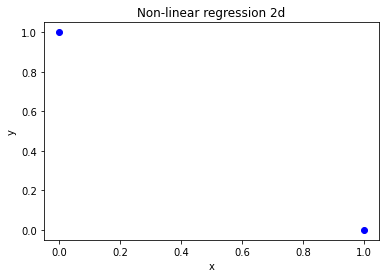

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn.functional
import math


class Model(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.w = torch.nn.Parameter(torch.reshape(torch.tensor([0.0], dtype=float, requires_grad=True), (1, -1)))
        self.b = torch.nn.Parameter(torch.reshape(torch.tensor([0.0], dtype=float, requires_grad=True), (1, -1)))

    def forward(self, x):
        return torch.sigmoid(1-(x @ self.w + self.b))


def main():
    x_train = torch.reshape(torch.tensor([0.0,1.0], dtype=float), (-1, 1))
    y_train = torch.reshape(torch.tensor([1.0,0.0], dtype=float), (-1, 1))
    learning_rate = 0.0000001
    num_epoch = 2000

    model = Model()
    loss_fun = torch.nn.MSELoss(reduction="mean")
    optimizer = torch.optim.SGD([model.w, model.b], lr=learning_rate)
    x_train = x_train
    y_train = y_train

    for epoch in range(num_epoch):
        y_hat = model(x_train)
        loss = loss_fun(y_train, y_hat)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(model.state_dict())
    print(f"Loss: {loss_fun(y_train, y_hat)}")

    plt.title("Non-linear regression 2d")
    plt.xlabel("x")
    plt.ylabel("y")

    # Plots the actual values
    plt.plot(x_train.detach(), y_train.detach(), 'o', label='$(x^{(i)},y^{(i)})$', color='blue')
    # Creating numpy array ranging from smallest to largest entry in the tensor
    x = np.arange(start=int(torch.min(x_train).item()), stop=int(torch.max(x_train).item() + 2), step=1,
                  dtype='float32')
    # Converting x to a tensor and running forward to get y_hat, then detaching it so it can be displayed
    y_hat = model.forward(torch.reshape(torch.tensor(x), (-1, 1))).detach()
    plt.plot(x, y_hat, '-', color='red', label='$\\hat y = f(x) = 20*sigmoid(xW+b)+31$')
    plt.legend()
    plt.show()


if __name__ == '__main__':
    main()
